Today we will discuss the two dimensional quantum harmonic oscillator. We will see how the angular momentum can be
used to find a complete eigenbasis. And in the end we will make a nice animation of two wave packets in the
harmonic potential for which this picture is a short preview:

![Image](2d_harm2.png)

## The 2d Harmonic Oscillator

The Hamiltonian for the 2d harmonic oscillator is

$$
\hat H = \frac{1}{2m} \left( \hat p_x^2 + \hat p_y^2 \right)+ \frac{1}{2} m \omega^2 \left( \hat x^2 + \hat y^2 \right)
$$

Here we restrict $x, y \in [-\text{Length}/2, \text{Length}/2]$, only wave function that are more or less concentrated in the middle of this 
region can be described well enough with this finite numerical model. That means, we are focussing on low energy states.

The general form of constructing 2d operators with the Kronecker product was discussed [previously](https://znswanderer.github.io/physics/2d-Quantum-Systems/), so it is quite straightforward to construct the Hamiltionian as: 

In [1]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg as linalg
from scipy import integrate
from types import SimpleNamespace
import matplotlib.pyplot as plt
from IPython.display import Video


def make_2d_HO(N, Length, hbar=1, mass=1, omega=2*np.pi):
    """Construct the quantum Hamiltonian for the 2d harmonic oscillator"""
    x = np.linspace(-Length/2, Length/2, N)
    y = np.linspace(-Length/2, Length/2, N)
    extent = [-Length/2, Length/2, -Length/2, Length/2]

    dx = np.diff(x)[0]
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)) / dx**2
    One = sparse.eye(N)

    D2_x_2d = sparse.kron(D2, One)
    D2_y_2d = sparse.kron(One, D2)

    X2 = sparse.kron(sparse.diags([x**2], [0]), One)
    Y2 = sparse.kron(One, sparse.diags([y**2], [0]))
    
    V = 0.5 * mass * omega**2 * (X2 + Y2)
    T = -(hbar**2 / (2 * mass)) * (D2_x_2d + D2_y_2d)  
    H = T + V
    
    return SimpleNamespace(**locals())
    
    
def calc_eigs(s, k):
    """Calculate the first *k* eigenvalues for a quantum system *s*"""
    eigs, eigv = linalg.eigsh(s.H, k, which='SM')
    return SimpleNamespace(**locals())

In [2]:
# Construct the quantum system
HO_2d = make_2d_HO(N=301, Length=6) 

# Calculate the lowest 21 eigenvalues
res_HO_2d = calc_eigs(HO_2d, k=21) # Takes about 30 seconds on a mac book pro 2019, 2.6 GHz 6-Core, for N=301

We can now plot the first eigenvalues:

In [3]:
import scienceplots
plt.rcParams['figure.dpi'] = 300
plt.style.use(['science', 'notebook', 'grid', 'vibrant'])
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

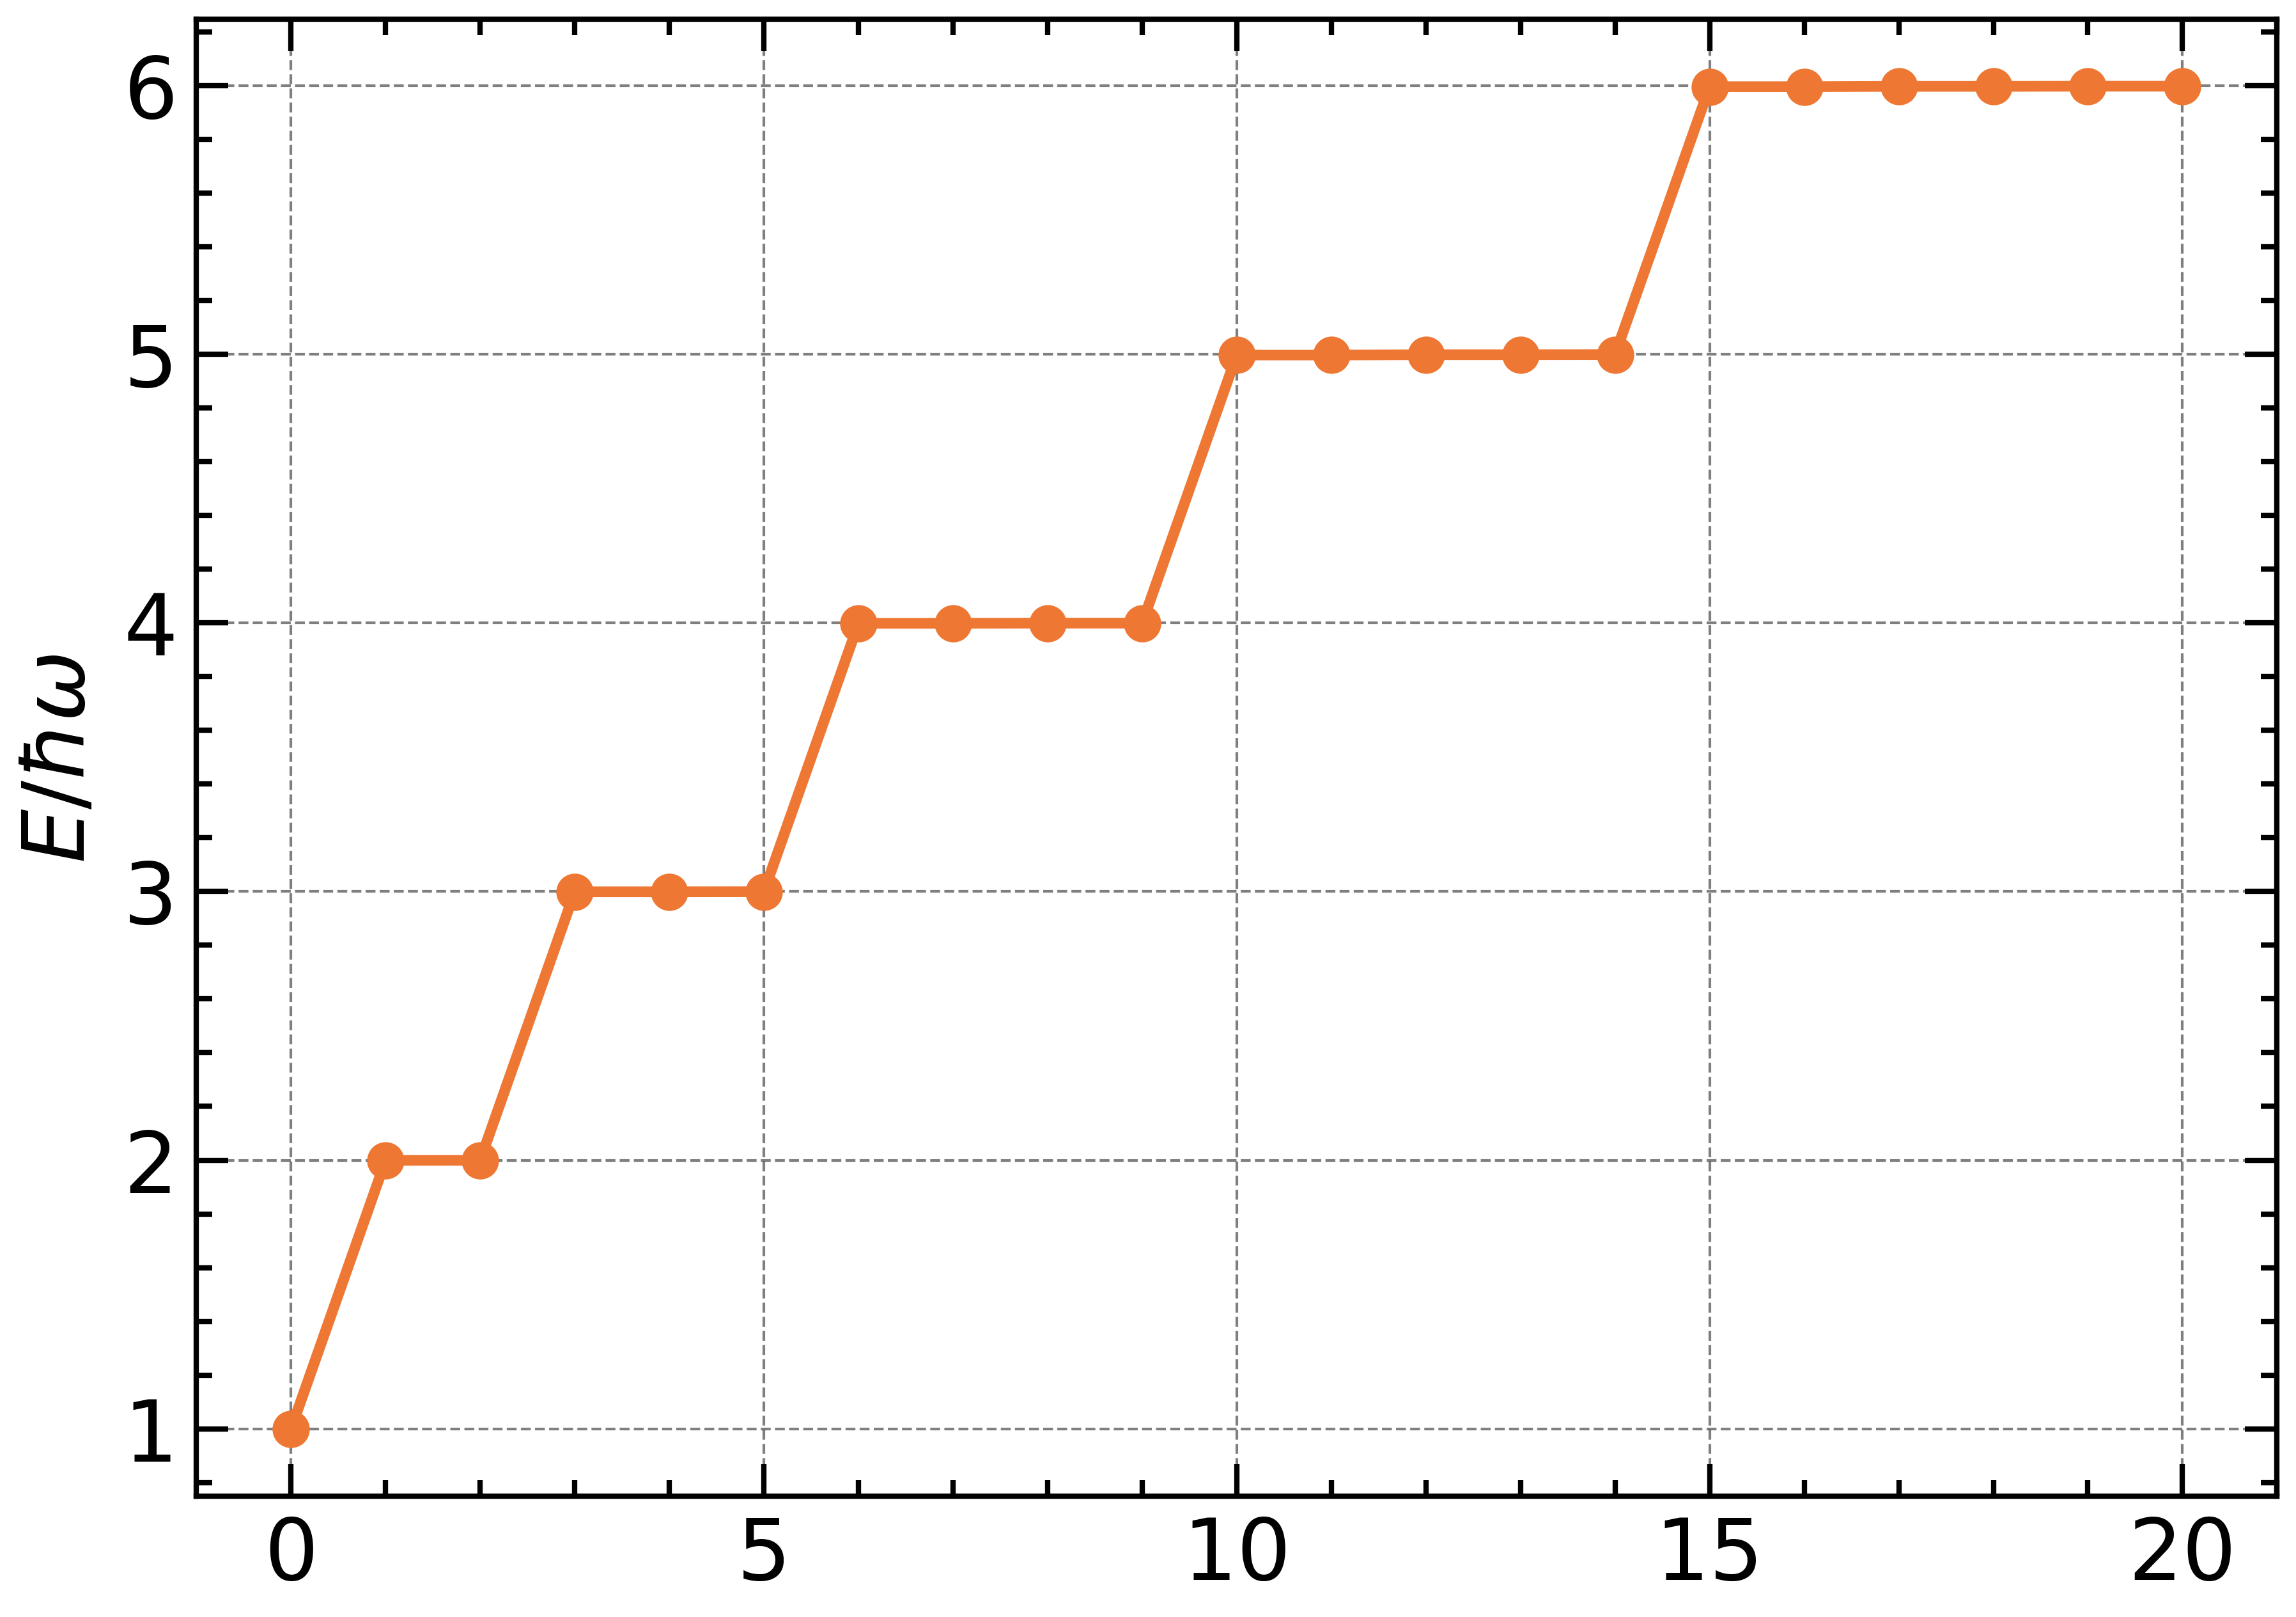

In [4]:
plt.figure(figsize=(7,5))
plt.plot(res_HO_2d.eigs/(HO_2d.hbar * HO_2d.omega), '-o')
plt.ylabel("$E/\hbar \omega$");

We see, that with higher energy eigenvalues the degree of *degeneracy* increaes, i.e., the number of orthogonal eigenstates with the same energy.
This is due to the fact that the Hamiltonian for the 2d harmonic oscillator can also be understood as a system of two independent 1d harmonic
oscillators:

$$
\hat H = \hat H_x \otimes \textbf{1} + \textbf{1}  \otimes \hat H_y = 
\left( \frac{1}{2m} \hat p_x^2 + \frac{1}{2} m \omega^2 \hat x^2 \right)
+ \left( \frac{1}{2m} \hat p_y^2 + \frac{1}{2} m \omega^2 \hat y^2 \right)
$$

with

$$
\begin{align}
\hat p_x = \hat p_x^{\text{1d}} \otimes \textbf{1}, \qquad & \hat x = \hat x^{\text{1d}} \otimes \textbf{1} \\
\hat p_y = \textbf{1} \otimes \hat p_y^{\text{1d}}, \qquad & \hat y = \textbf{1} \otimes \hat y^{\text{1d}} \, .
\end{align}
$$

Now we can find product states for the two-dimensional system
$\vert \psi \rangle = \vert \psi_x \rangle \otimes \vert \psi_y \rangle$ that are energy eigenstates for the
two-dimensional system by using the eigenstates of the one-dimensional systems:

$$
\hat H |n \rangle = E_n |n \rangle = 
(\hat H_x \otimes \textbf{1} + \textbf{1}  \otimes \hat H_y) |n_x, n_y \rangle = \hbar \omega (n_x + 1/2 + n_y + 1/2) |n_x, n_y \rangle 
$$

The observed degree of degeneracy is then explained by the number of possible combinations of the one-dimensional
eigenstates:

$$
\begin{array}{|c|c|c|c|}
\hline
  n
  & E_n  
  & \text{Combinations: } |n_x, n_y\rangle
  & \# \text{degeneracy}
  \\ 
\hline
   0
   & \hbar \omega 
   & |0, 0\rangle
   & 1
   \\
\hline
   1
   & 2 \, \hbar \omega
   & |0, 1\rangle , \, |1, 0\rangle   
   & 2
   \\
\hline
   2
   & 3 \, \hbar \omega
   & |0, 2\rangle , \, |1, 1\rangle, \, |2, 0\rangle  
   & 3
   \\
\hline
   3
   & 4 \, \hbar \omega 
   & |0, 3\rangle , \, |1, 2\rangle, \, |2, 1\rangle, \, |3, 0\rangle 
   & 4 
   \\
\hline
   4 
   & 5 \, \hbar \omega 
   & |0, 4\rangle , \, |1, 3\rangle, \, |2, 2\rangle, \, |3, 1\rangle, \, |4, 0\rangle  
   & 5
   \\
\hline
\end{array}
$$

We have the energy eigenvalues $E_n = (n+1) \hbar \omega$, where the degree of degeneracy of each eigenvalue is $n+1$.

Of course every linear combination of the eigenstates for a given $n$ will also be an eigenstate, like 
$\hat H \left( a \vert 0, 1 \rangle + b \vert 1, 0 \rangle\right) = E_1 \left( a \vert 0, 1 \rangle + b \vert 1, 0 \rangle \right)$. 
These form a sub vector space.

## Symmetry and Degeneracy

The eigenstates for the 1d harmonic oscillator can be calculated easily:

In [5]:
def make_1d_HO(N, Length, hbar=1, mass=1, omega=2*np.pi):
    """Construct the quantum Hamiltonian for the 1d harmonic oscillator"""
    x = np.linspace(-Length/2, Length/2, N)
    dx = np.diff(x)[0]
    
    D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(N, N)) / dx**2
    One = sparse.eye(N)
    X2 = sparse.diags([x**2], [0])
    
    V = 0.5 * mass * omega**2 * X2
    T = -(hbar**2 / (2 * mass)) * D2  
    H = T + V
    
    return SimpleNamespace(**locals())

# Construct the quantum system
HO_1d = make_1d_HO(N=301, Length=6) 

# Calculate the first 2 eigenvalues
res_HO_1d = calc_eigs(HO_1d, k=2)
psi0, psi1 = res_HO_1d.eigv.T

Let's plot the first two eigenstates:

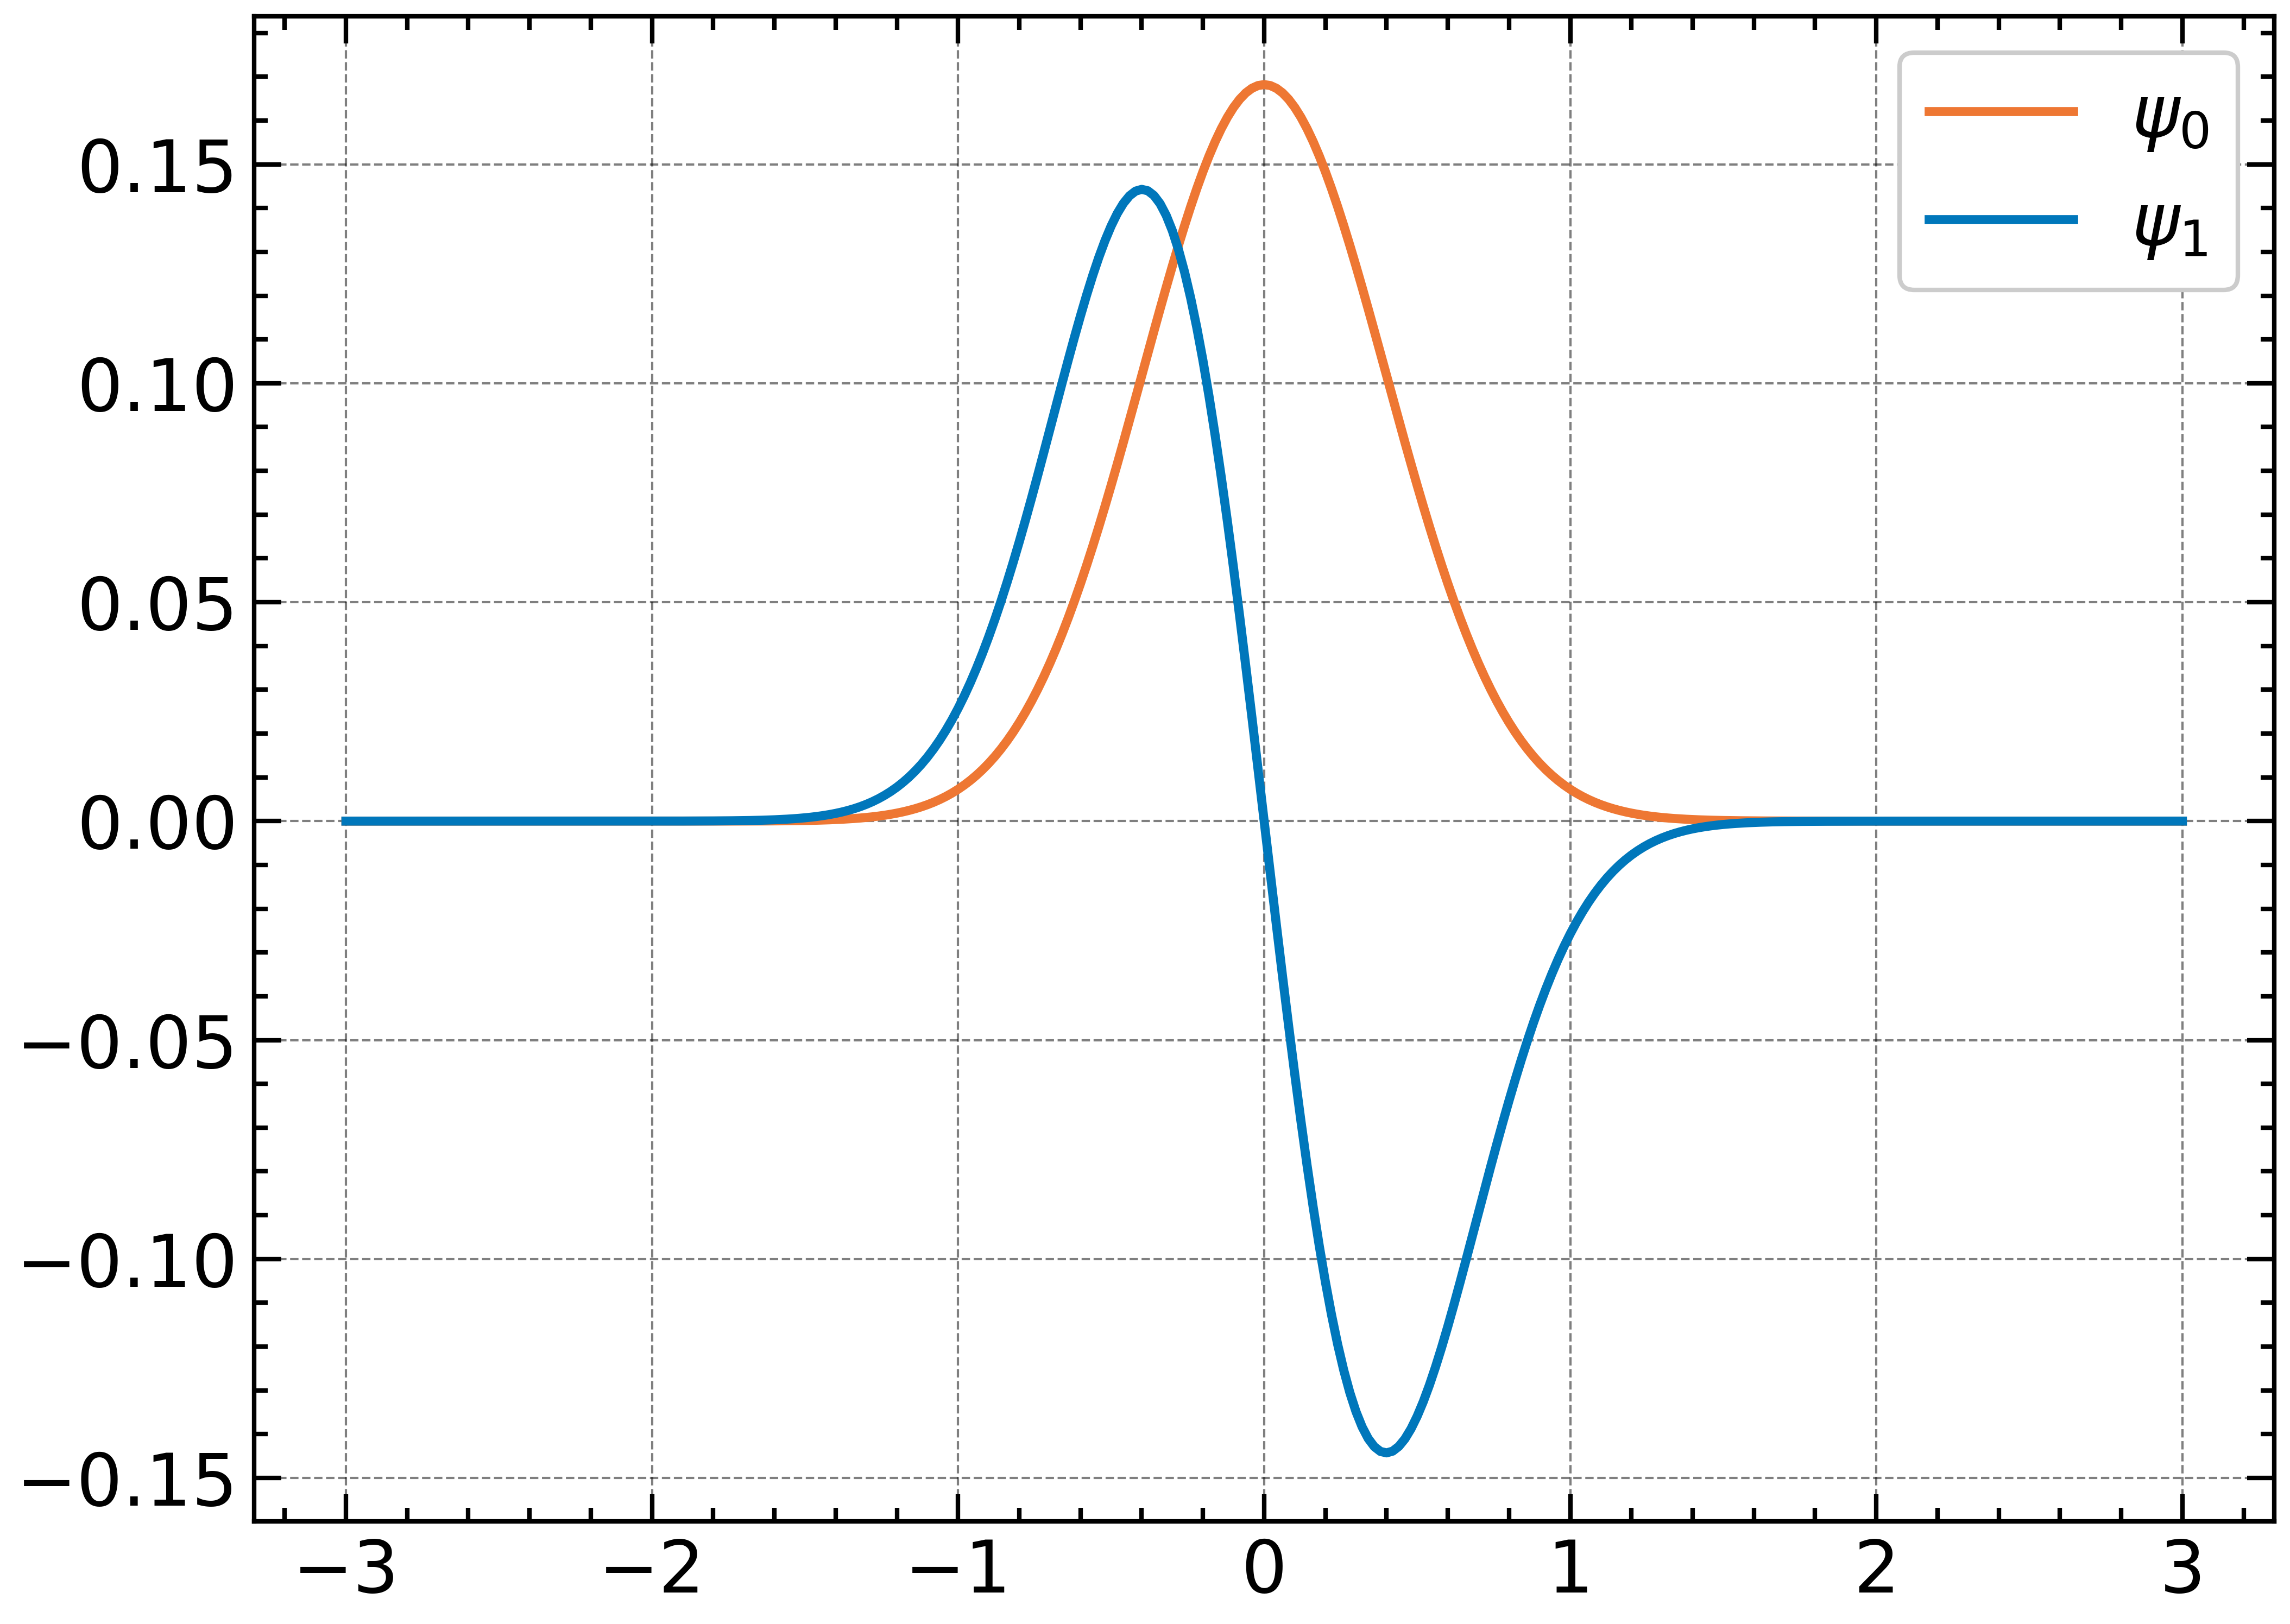

In [6]:
plt.plot(HO_1d.x, psi0, label=r"$\psi_0$")
plt.plot(HO_1d.x, psi1, label=r"$\psi_1$")
plt.legend();

We can combine them to form an eigenstate for the 2d system, $\vert \psi \rangle = \vert 0 \rangle \otimes \vert 1 \rangle$:

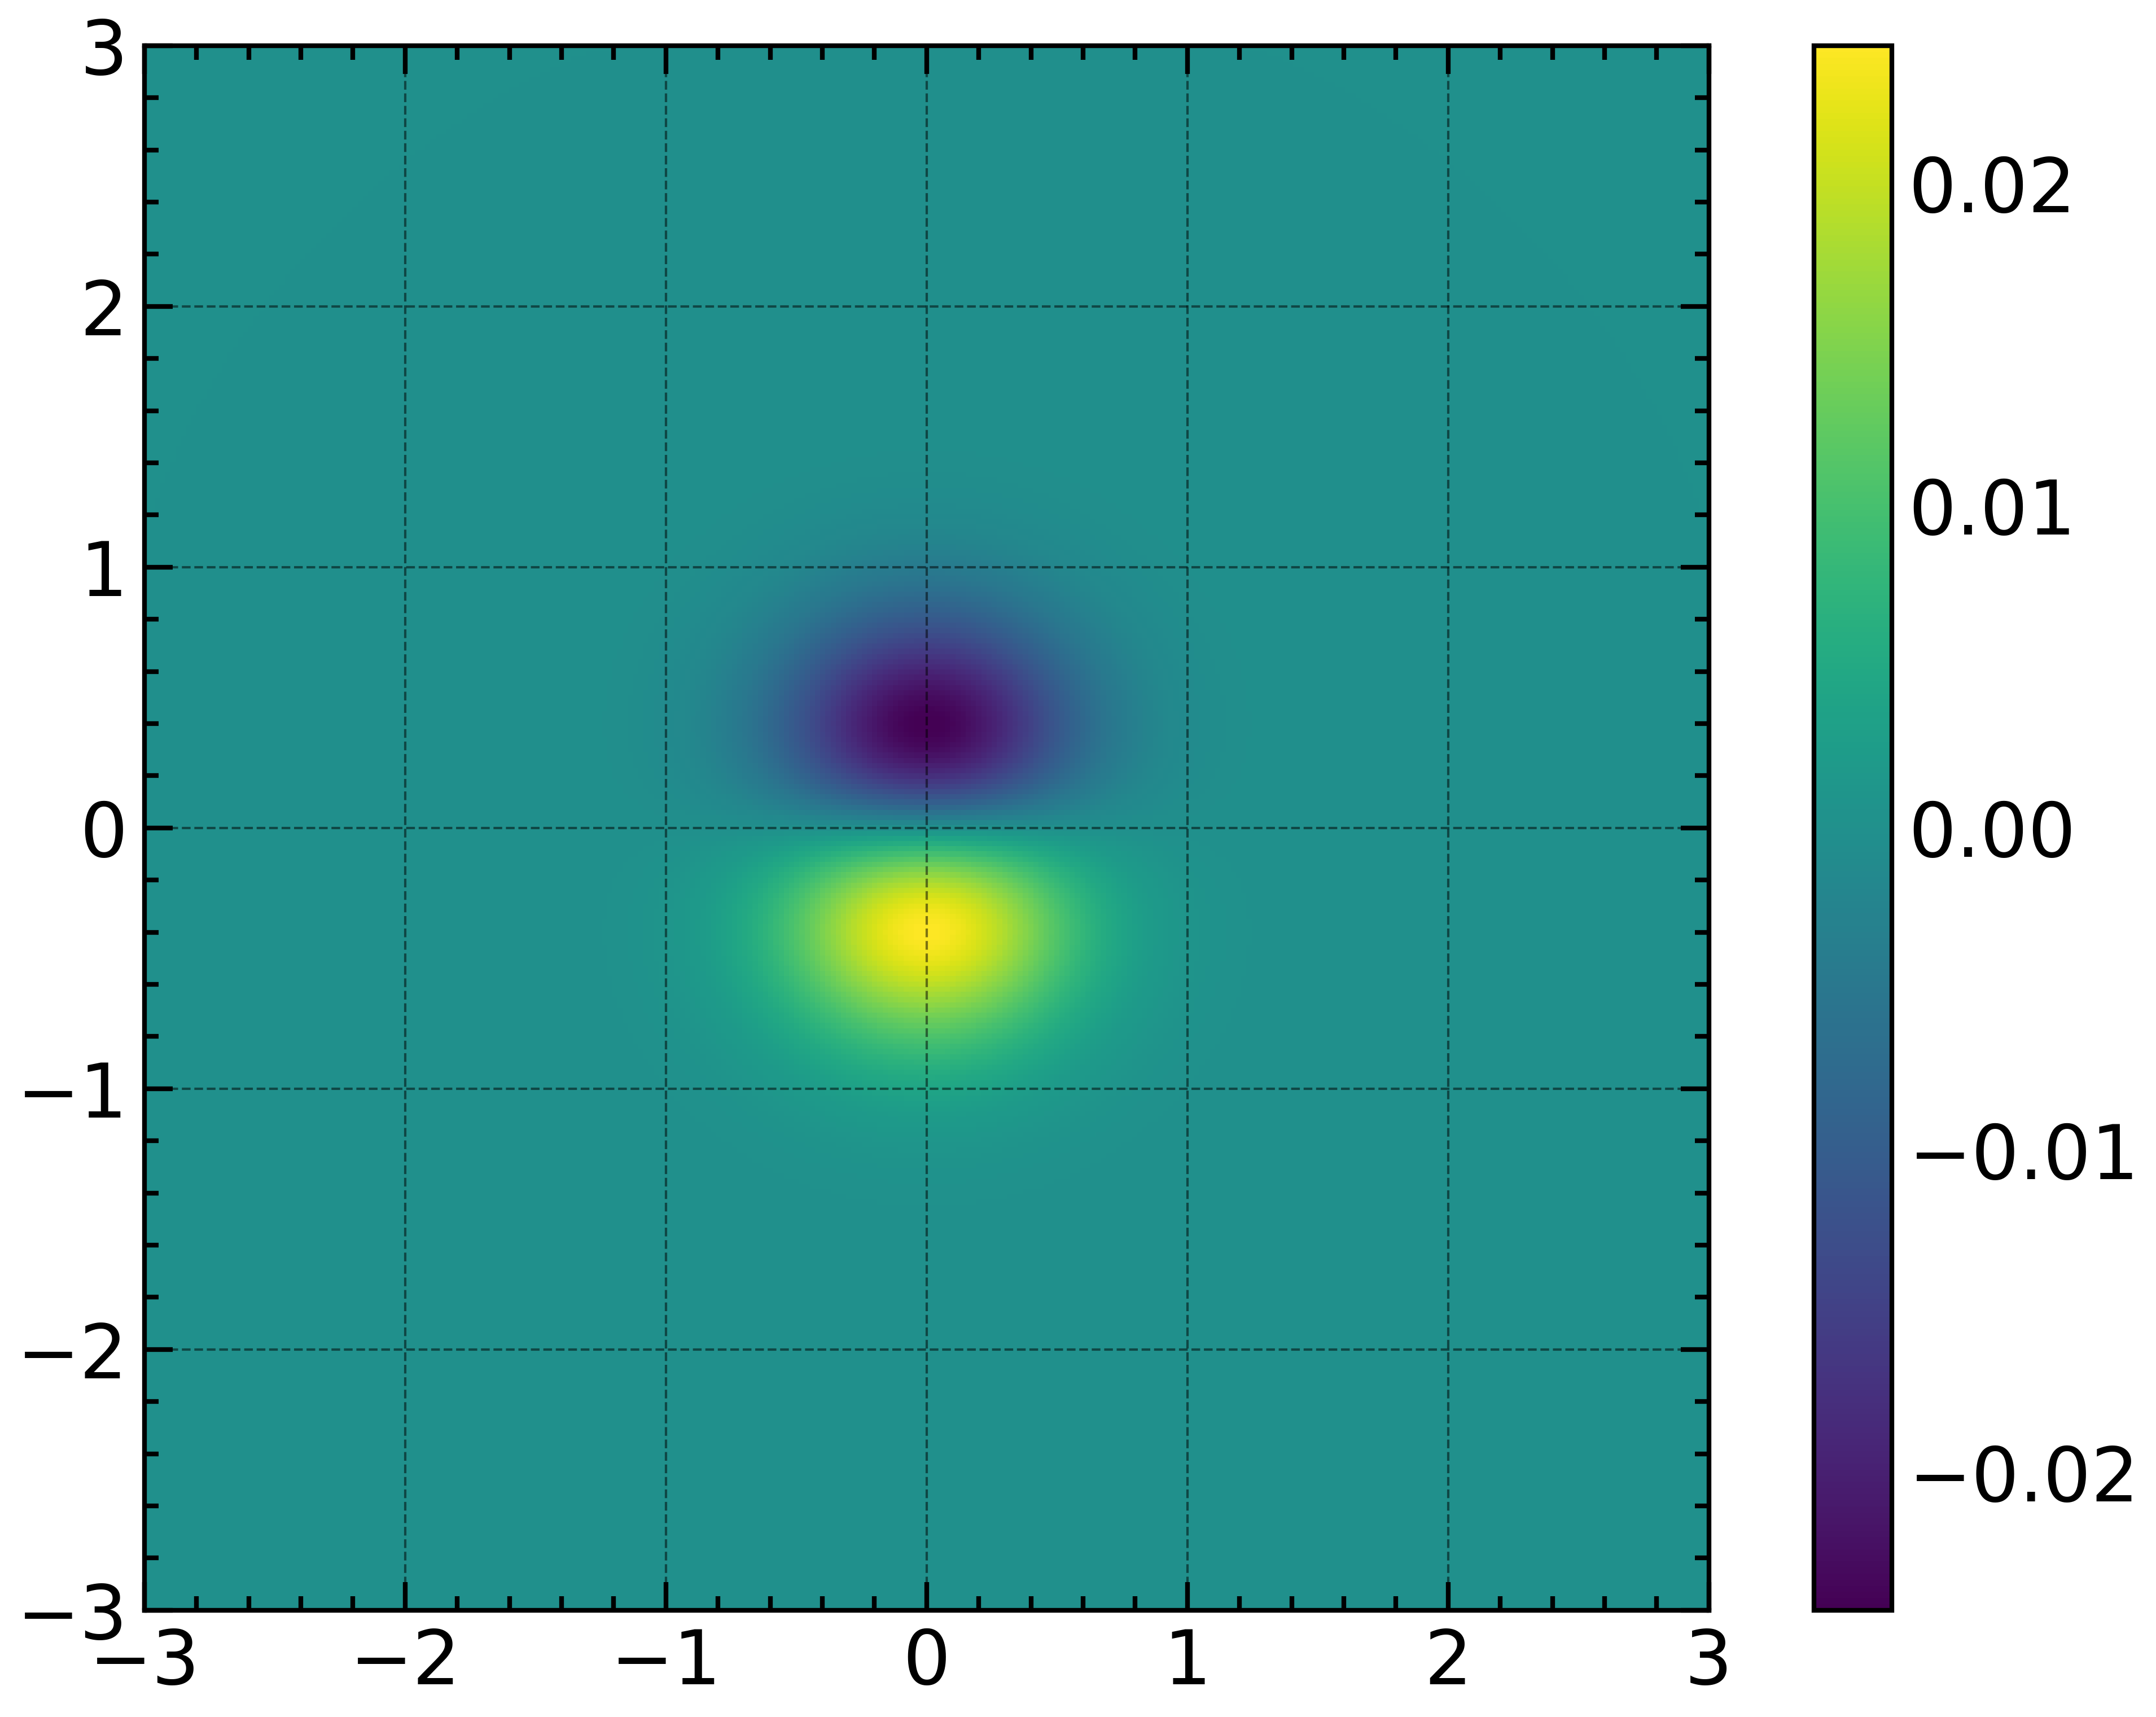

In [7]:
# Construct the two-dimensional eigenstate from the two 1d eigenstates
# This will be a one dimensional vector of size N*N if N is the size of psi0 and psi1 
psi = np.kron(psi0, psi1)

# Convert psi to a 2d map for display.
# (We need "Fortran" ordering in reshape and move the origin in imshow to lower
# to have the x and y axis oriented to correct way)
psi_2d = np.reshape(psi, (HO_1d.N, HO_1d.N), order="F")
im = plt.imshow(psi_2d, extent=HO_2d.extent, origin='lower')

plt.rcParams['axes.grid'] = False # bug-fix for colorbar problem in matplotlib
plt.colorbar(im)
plt.rcParams['axes.grid'] = True

Using the method from the [last post](https://znswanderer.github.io/physics/Angular-Momentum/) we can rotate
this state:

In [8]:
def angular_momentum(box):
    x_op = sparse.kron(sparse.diags([box.x], [0]), box.One)
    y_op = sparse.kron(box.One, sparse.diags([box.y], [0]))
    D_s_op = sparse.diags([-1, 1], [-1, 1], shape=(box.N, box.N)) / (2*box.dx)
    p_op = - 1j * box.hbar * D_s_op
    px_op = sparse.kron(p_op, box.One)
    py_op = sparse.kron(box.One, p_op)
    L_op = x_op @ py_op - px_op @ y_op
    return L_op

L_op = angular_momentum(HO_2d)

In [9]:
phi_eval = np.linspace(0, 2*np.pi, 5)
sol = integrate.solve_ivp(lambda phi, psi: (-1j / HO_2d.hbar) * (L_op @ psi), 
                          t_span = [phi_eval[0], phi_eval[-1]], y0 = psi.astype(complex) , t_eval = phi_eval, method="RK23")

The rotated states for $\Delta \varphi \in \{0, \pi / 2, \pi, 3 \pi/2 \}$ are:

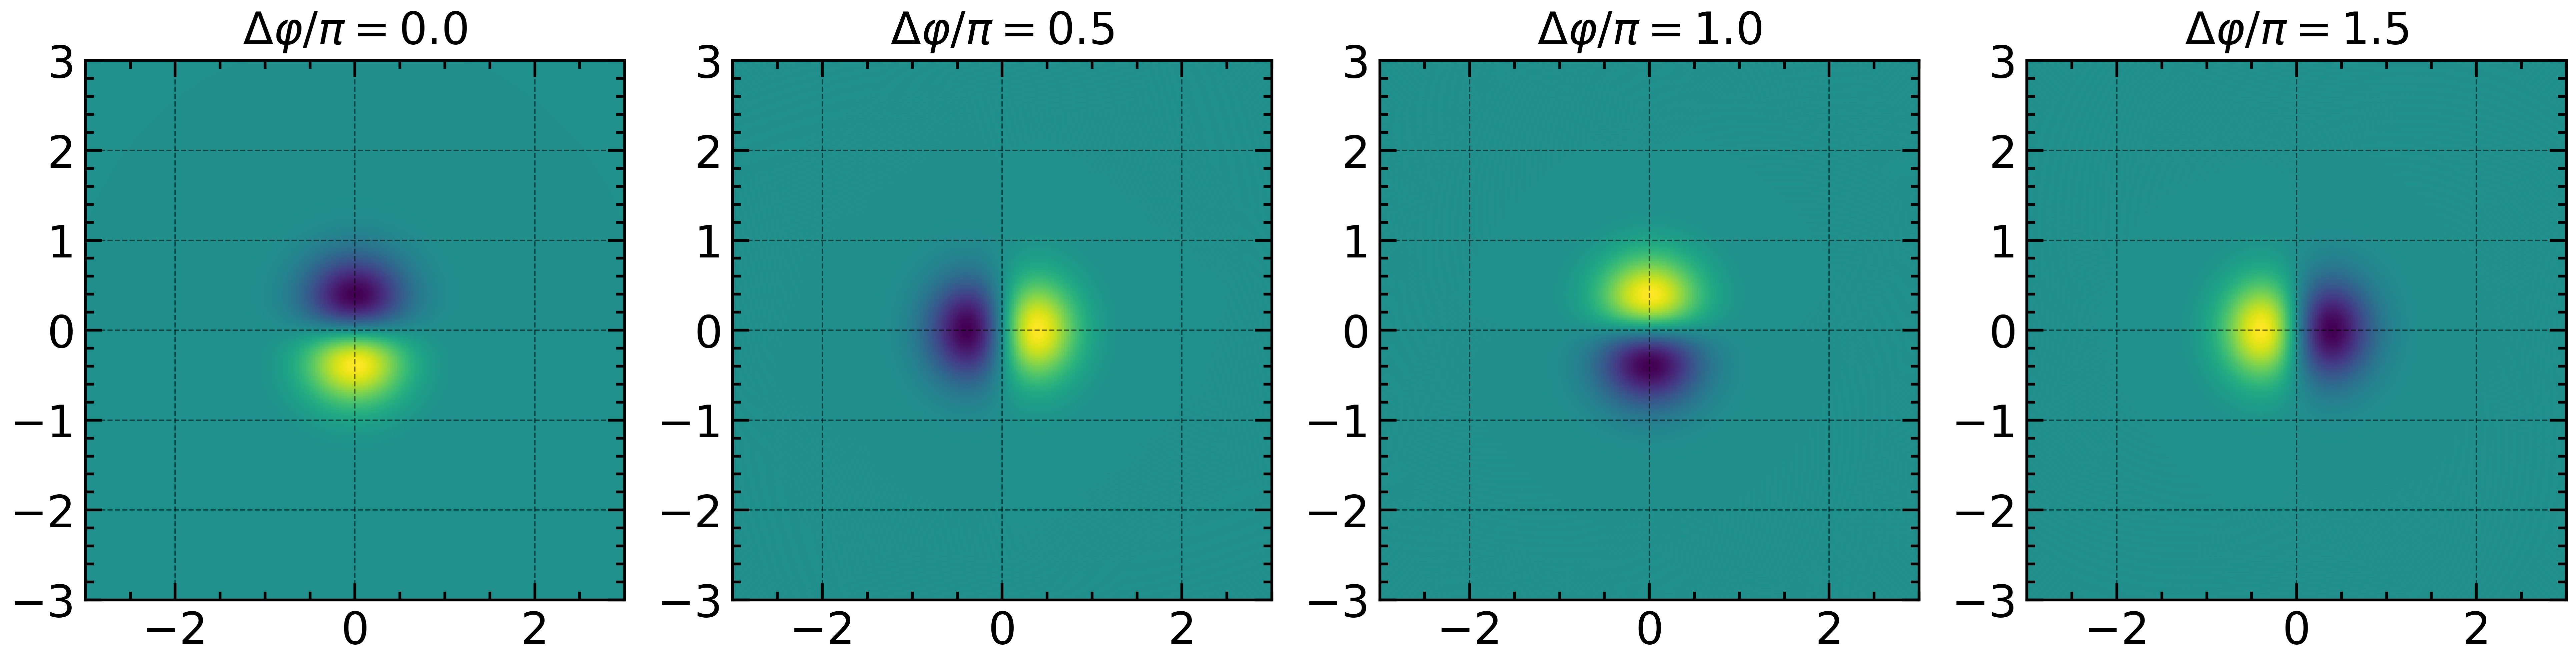

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(16,6))
for n in range(4):
    psi_n = sol.y[:, n]
    psi_n_2d = np.reshape(psi_n, (HO_1d.N, HO_1d.N), order="F")
    axs[n].imshow(psi_n_2d.real, extent=HO_2d.extent, origin="lower")
    axs[n].set_title(r"$\Delta \varphi / \pi = %.1f$" % (phi_eval[n]/np.pi))

So we find, that the two linear independent eigenvectors $\vert 0, 1 \rangle$ and $\vert 1, 0 \rangle$ 
are just rotations of one another. These is easy to understand as a rotation by $\pi /2$ just switches
the $x$ and $y$ axis:

$$
\begin{align}
\hat R_{\pi /2} \vert 0, 1 \rangle & = -\vert 1, 0 \rangle \\
-\hat R_{\pi /2} \vert 1, 0 \rangle & = -\vert 0, 1 \rangle  \, .
\end{align} 
$$

with the rotation operator 

$$
\hat R_{\pi /2} = e^{-i \pi \hat L / 2 \hbar} \, .
$$

So these eigenstates of $\hat H$ are clearly not eigenstates of the angular momentum operator as applying
the angular momentum operator via the rotation operator changes a state, which would be not the
case if these states were eigenstates. 
But using these states we can construct linear combinations, that are eigenstates. These combinations are:

$$
\begin{align}
|n=1, m=1 \rangle &= \frac{1}{\sqrt{2}} \Big( |0,1 \rangle - i |1, 0\rangle \Big) \\
|n=1, m=-1 \rangle &= \frac{1}{\sqrt{2}} \Big( |0,1 \rangle + i |1, 0\rangle \Big) \\
\end{align}
$$

These two are $\hat L$ eigenstates, which can be checked with python. First the construction
from the 1d eigenstates:

In [11]:
psi_plus = (np.kron(psi0, psi1) - 1j * np.kron(psi1, psi0)) / np.sqrt(2)
psi_minus = (np.kron(psi0, psi1) + 1j * np.kron(psi1, psi0)) / np.sqrt(2)

and then a quick check, for the eigenvalues:

In [12]:
np.round(psi_plus.conj() @ L_op @ psi_plus).real, np.round(psi_minus.conj() @ L_op @ psi_minus).real

(1.0, -1.0)

If we look at the absolute values of these states we see, that they are really rotational symmetric:

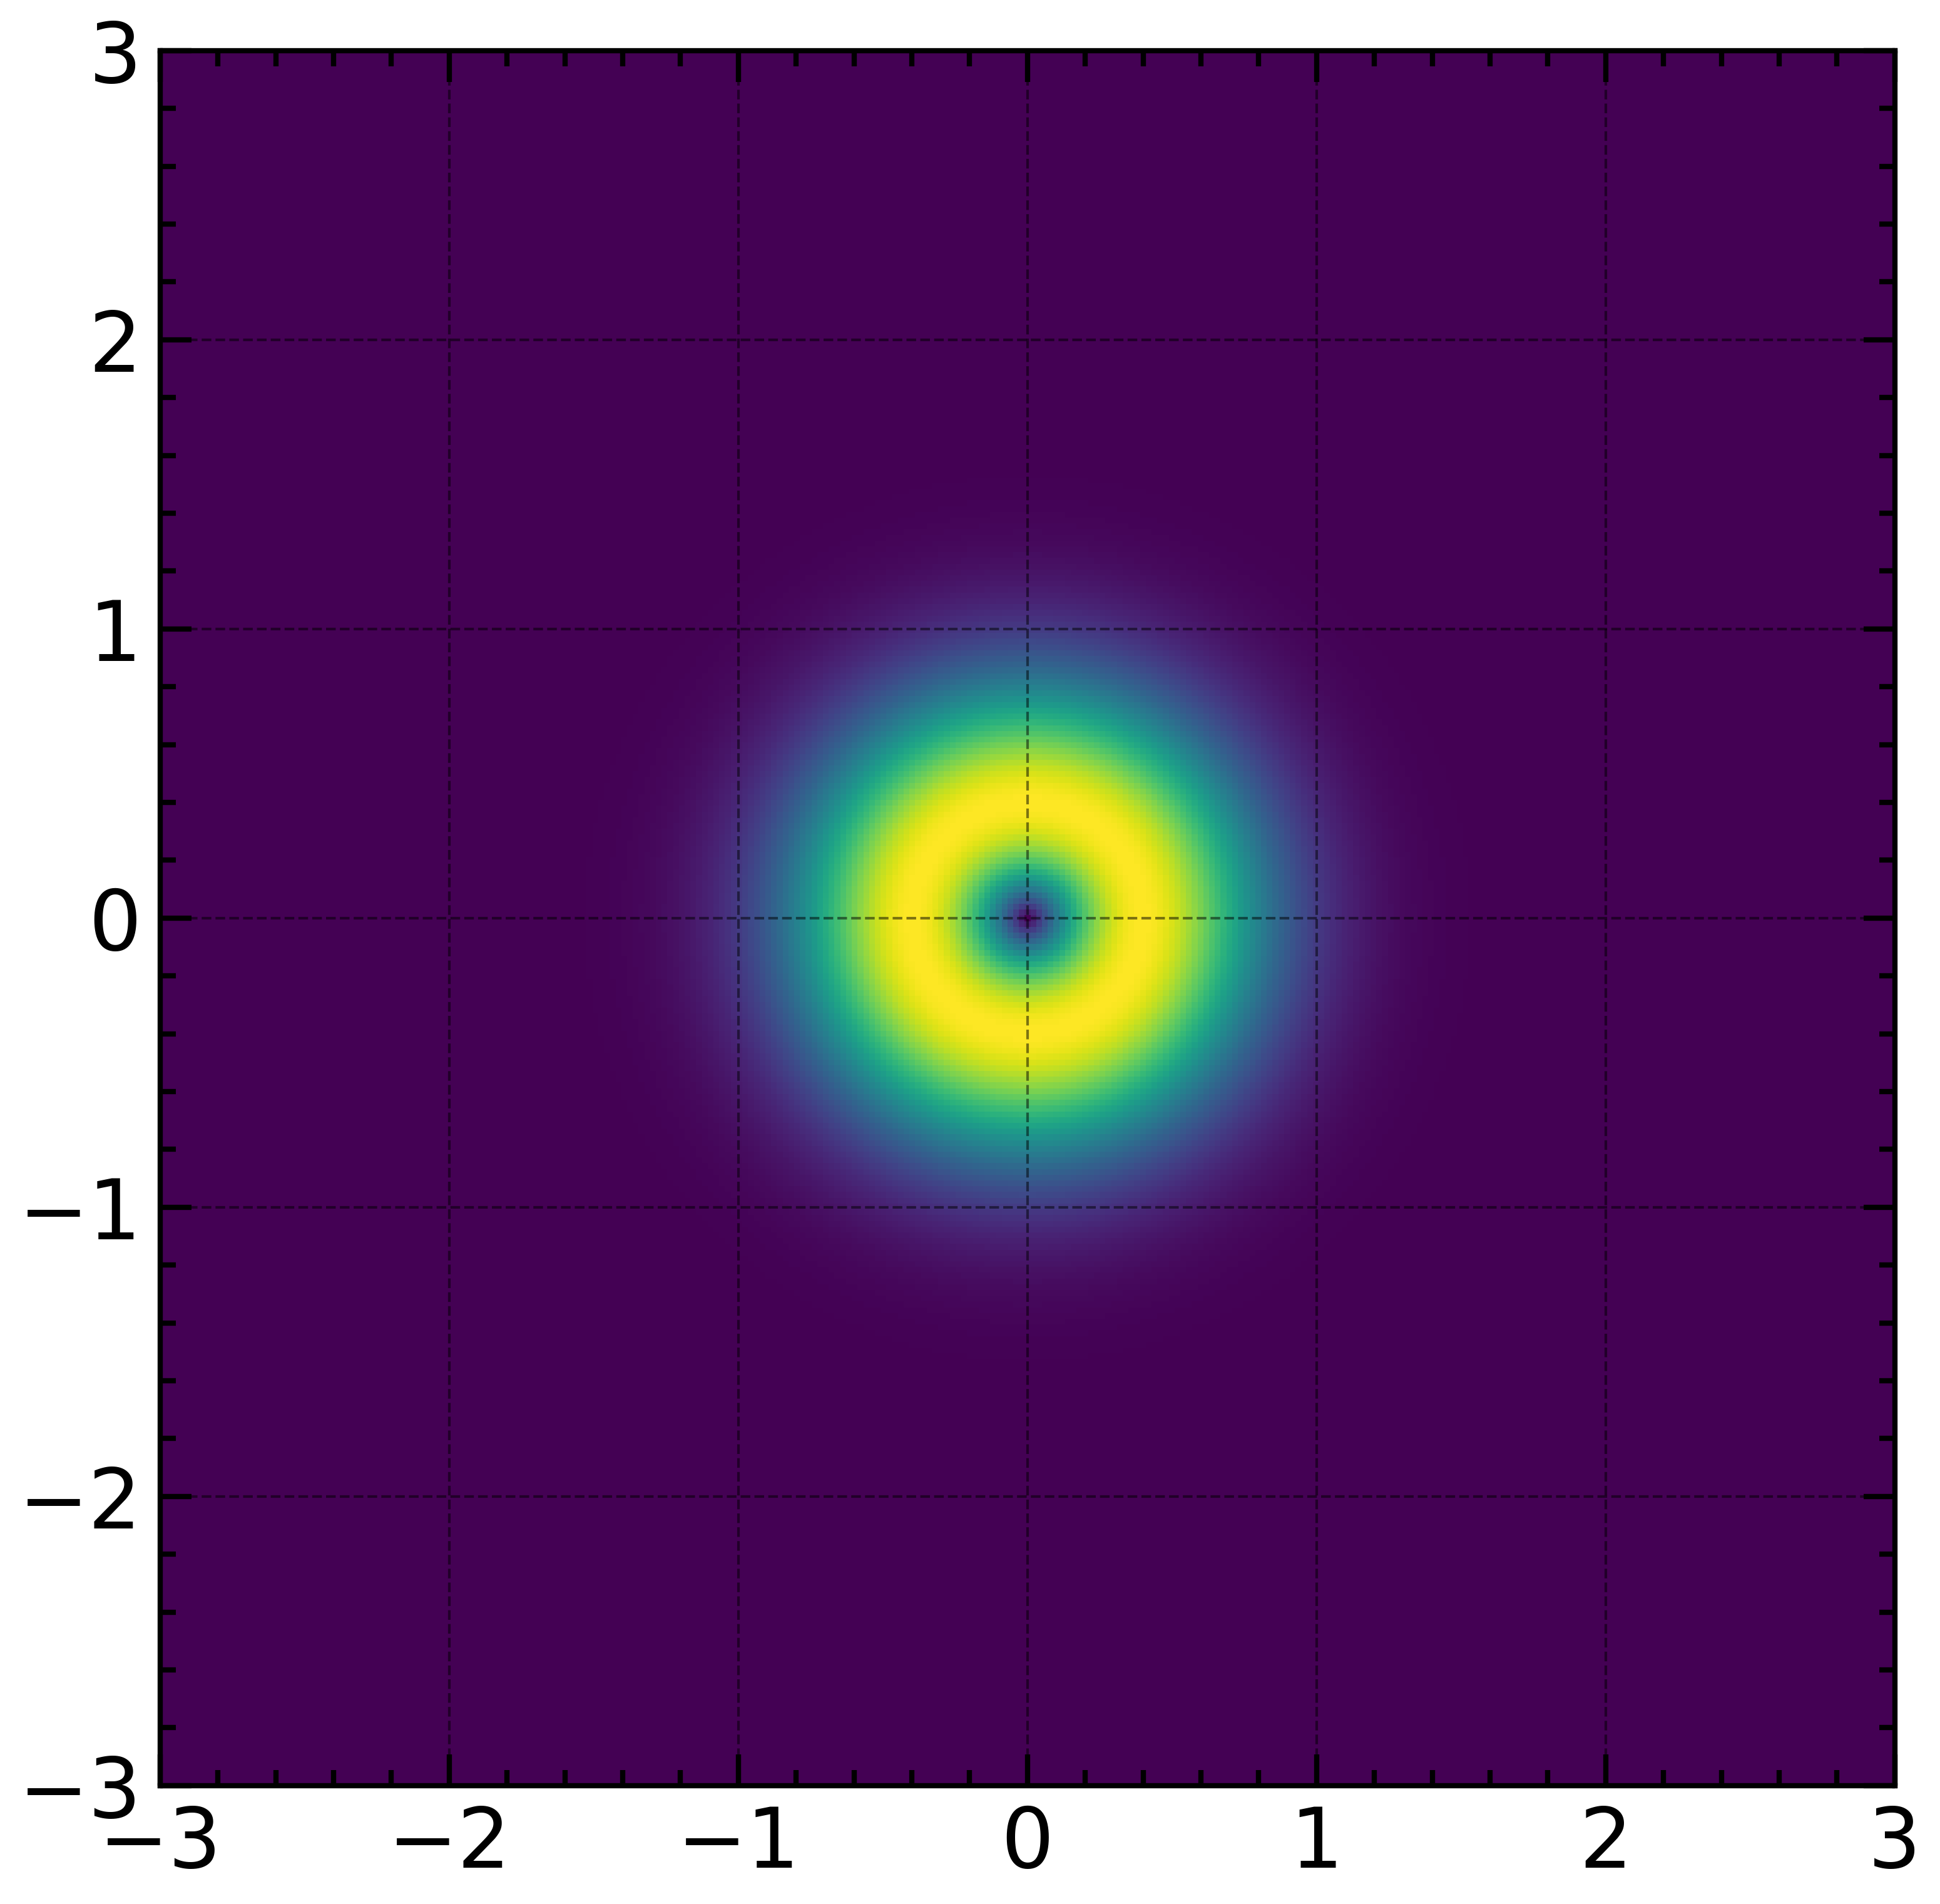

In [13]:
psi_plus_2d = np.reshape(psi_plus, (HO_1d.N, HO_1d.N), order="F")
im = plt.imshow(np.abs(psi_plus_2d), extent=HO_2d.extent, origin='lower')

## Finding the complete eigenbasis for $\hat H$ and $\hat L$

With this we see, that using both $\hat H$ and $\hat L$ we can construct a 
[complete set of commuting observables](https://en.wikipedia.org/wiki/Complete_set_of_commuting_observables).
This way we can resolve the degeneracy of the energy eigenvalues $n$ by specifying the angular
momentum eigenvalue $m$, so a basis state can be identified by the two quantum numbers $n$ and $m$.

To do this we use the same trick, we used [previously](https://znswanderer.github.io/physics/2d-Quantum-Systems/) and
introduce an artificial Hamiltonian, that includes the angular momentum operator as an artificial non-hermitian addition:

In [14]:
H_art = HO_2d.H + 1j * L_op

Compute the eigenvalues and states

In [15]:
eigs, eigv = sparse.linalg.eigs(H_art, k=21, which='SM')

The real part of the `eigs` array now contains the energy eigenvalues and the imaginary part the
angular momentum eigenvalues. We can use this to make a neat little plot:

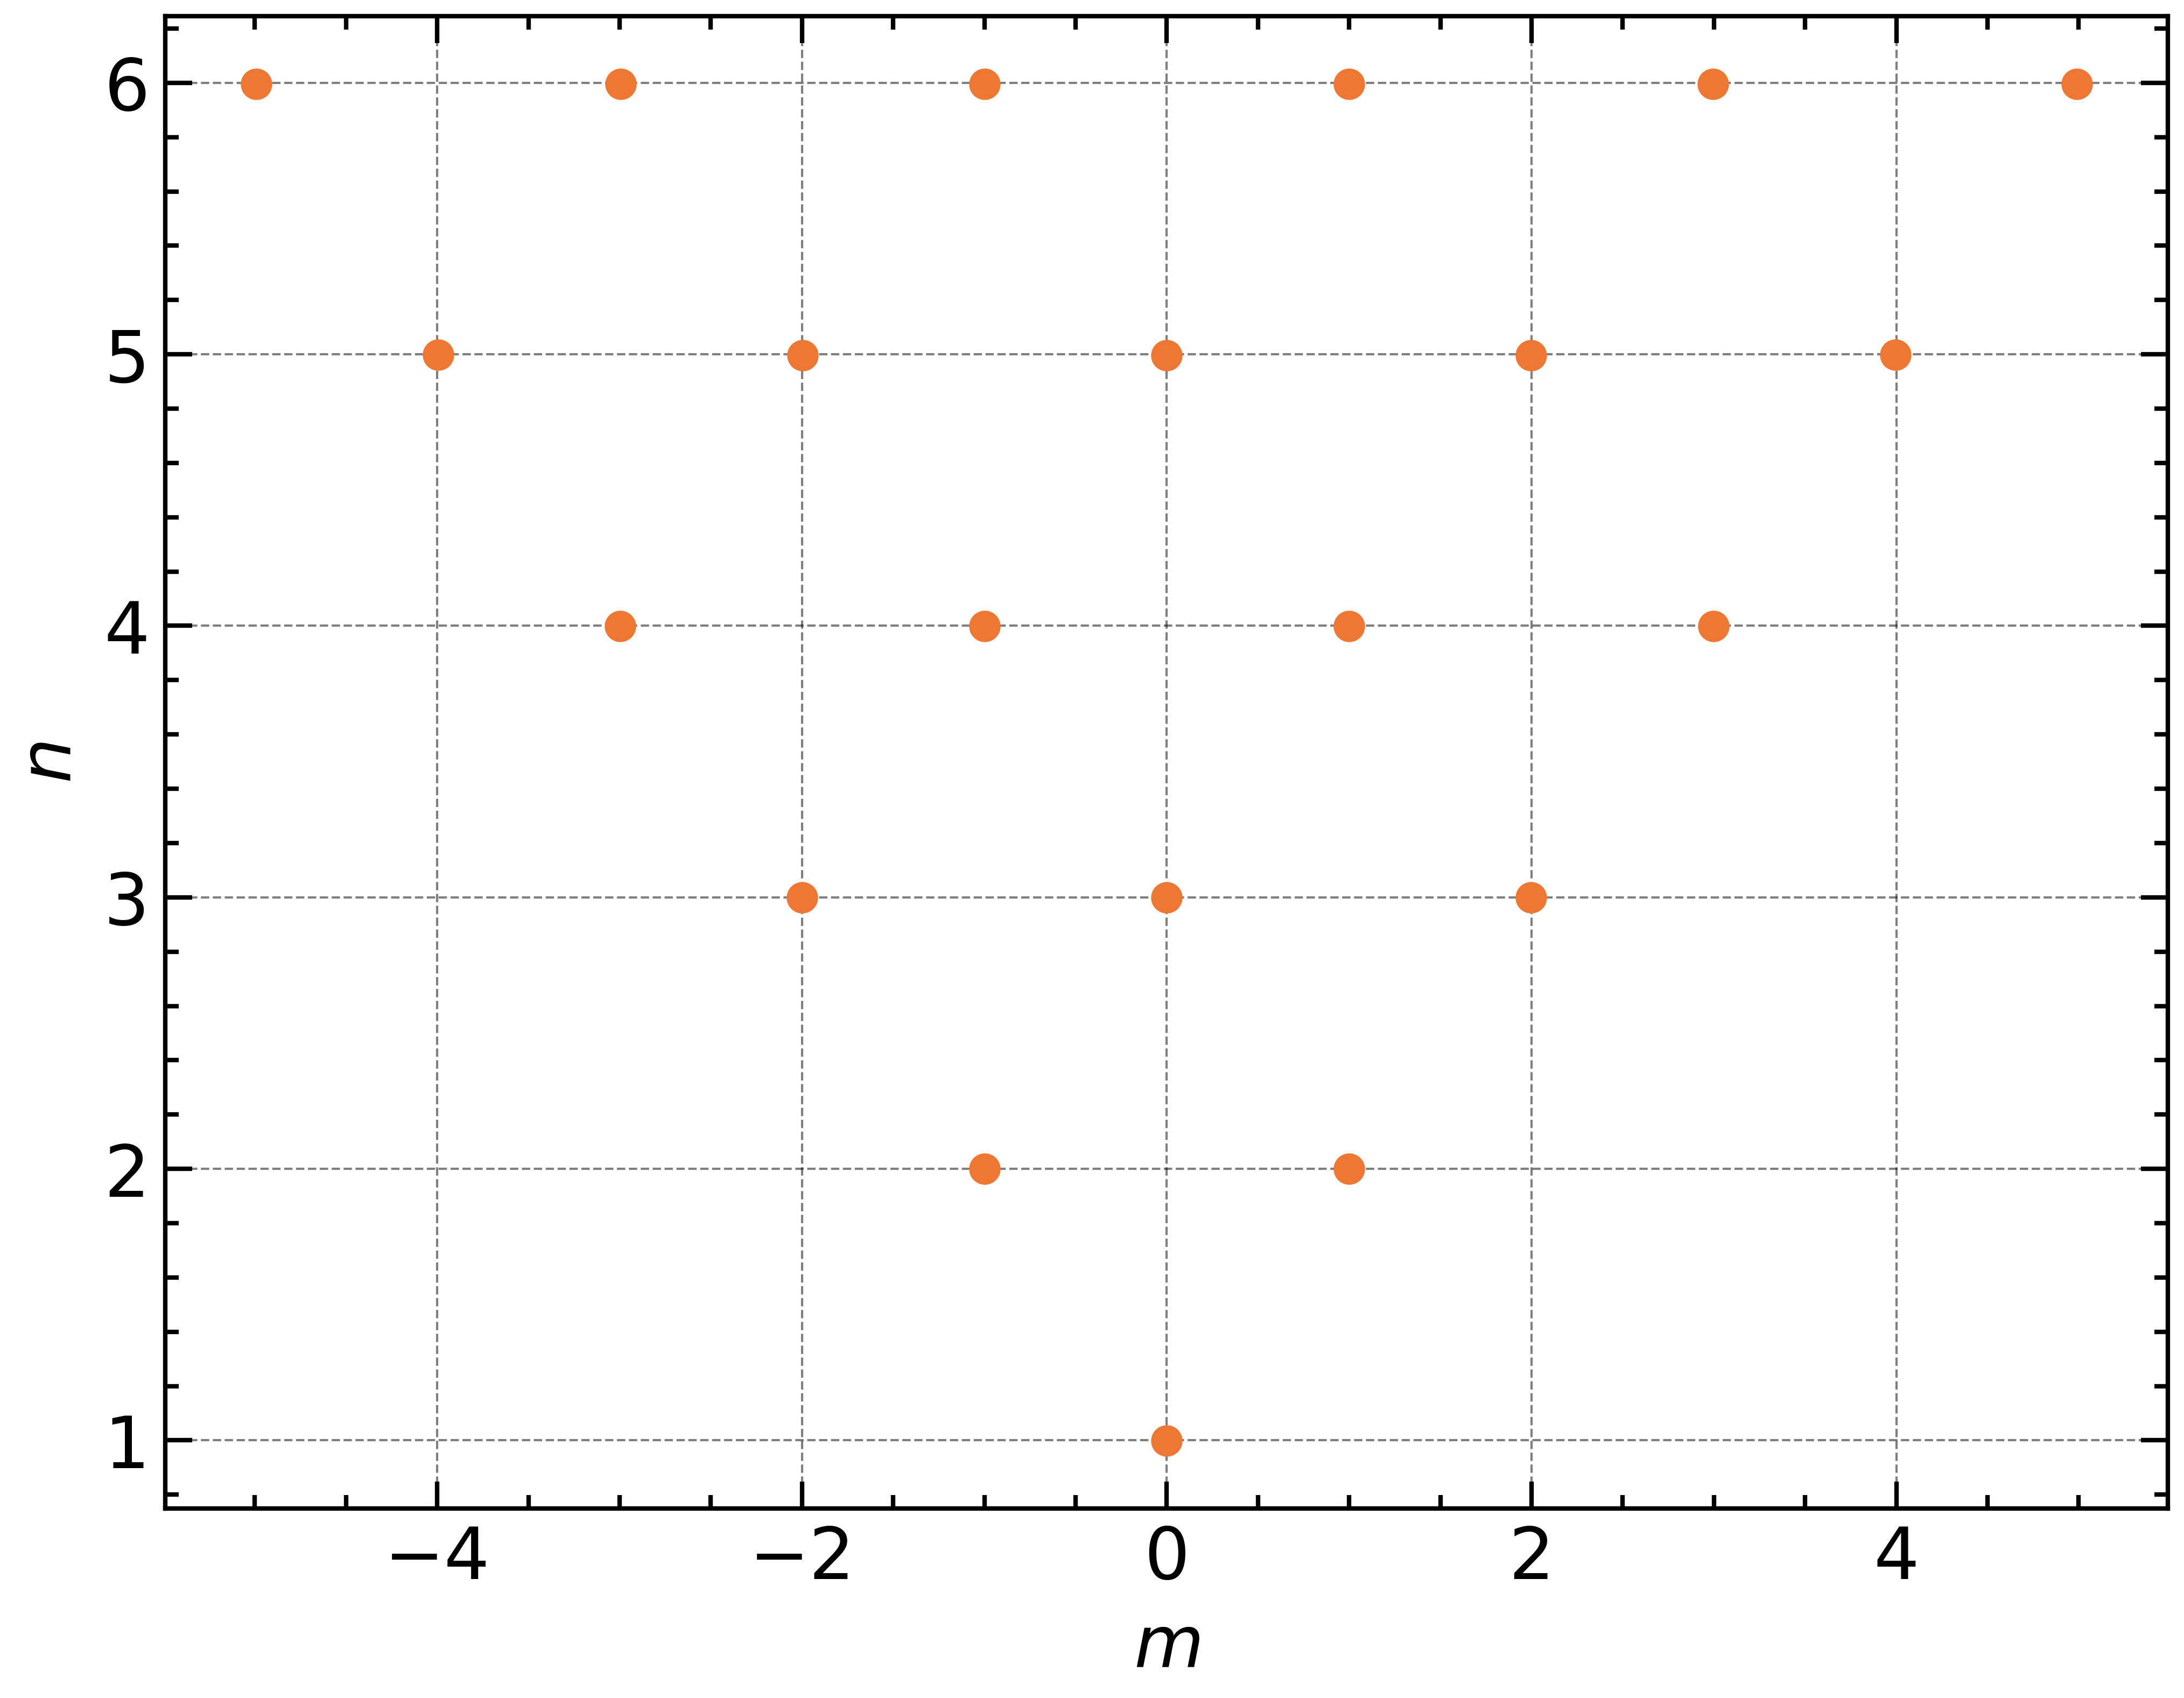

In [16]:
plt.plot(eigs.imag, eigs.real/(HO_2d.hbar * HO_2d.omega), 'o')
plt.ylabel("$n$")
plt.xlabel("$m$");

Each of these plots identifies a unique basis state for the two quantum numbers $n$ and $m$.

Now, let's plot the eigenstates for $n \leq 3$:

In [17]:
energies = np.round(eigs.real / (HO_2d.hbar * HO_2d.omega)).astype(int)
mask = energies <= 3

energies = energies[mask]
L_vals = np.round(eigs.imag).astype(int)[mask]
states = eigv.T[mask]

fig, axs = plt.subplots(6, 5, figsize=(12,16))
for n, m, psi in zip(energies, L_vals, states):
    row = n - 1
    column = m + 2
    psi_2d = np.reshape(psi, (HO_1d.N, HO_1d.N), order="F")
    axs[2*row][column].set_title(r"$|\psi|; \quad n=%d, m=%d$" % (n, m))
    axs[2*row][column].imshow(np.abs(psi_2d), extent=HO_2d.extent, origin="lower")
    axs[2*row+1][column].set_title(r"${Re}(\psi); \quad n=%d, m=%d$" % (n, m))
    axs[2*row + 1][column].imshow(psi_2d.real, extent=HO_2d.extent, origin="lower")
    
# remove empty subplots
for tmp in axs:
    for subplot in tmp:
        if not subplot.has_data():
            subplot.remove()
            
fig.tight_layout()

For the $m=0$ plots we see that with larger energies we get more nodes in the radial probability distribution.
In the case $n=3$ we see that if energy is stored in the angular momentum $\vert m \vert = 2$ one node 
in the radial distribution is removed, which just means that less energy is stored in the radial dimension, 
because this is now used for the angular momentum. In the $\mathrm{Re}(\psi)$ plots we see, that $\vert m \vert$ 
counts the number of nodes in the angular direction.

## Wave packets in motion

As a last part of this blog post, we can now simulate the motion of wave packets in the 2d
harmonic oscillator.

We start with the ground state as the basis for a wave packet, because the ground state has nice gaussian form:

In [18]:
psi0 = eigv.T[0]

This wave packet will be moved from the center and additionally we will give it a little boost, so
that we can observe some movement for $\vert \psi \vert^2$.
The operator for (spatial) translation was described [here](https://znswanderer.github.io/physics/Momentum-Operator/) and
the boost operator [here](https://znswanderer.github.io/physics/Time-Evolution/). The translation in $x$-direction 
and the boost in the $p_y$ momentum is done via the Kronecker product:

In [19]:
def boost_dpx(box, dp):
    boost_1d = sparse.diags([np.exp(1j * box.x * dp / box.hbar)], [0]) 
    return sparse.kron(boost_1d, box.One)

def translate_dy(box, dy):
    ns = range((-box.N)//2, box.N//2)
    ks = [(2 * np.pi / box.Length) * n for n in ns]
    psis = [np.exp(1j * k * box.x).T.conj() / np.sqrt(box.N) for k in ks]
    Q_inv = np.array(psis)
    Q = Q_inv.T.conj()
    U_1d = sparse.diags(np.exp(-1j * dy * np.array(ks)))
    return sparse.kron(box.One, Q @ U_1d @ Q_inv)

Applying this to the ground state

In [20]:
psi_ = boost_dpx(HO_2d, 6) @ translate_dy(HO_2d, 2) @ psi0

Now do the well known time [integration](https://znswanderer.github.io/reference#time-integration)

In [21]:
t_eval = np.linspace(0, 2, 201)
sol = integrate.solve_ivp(lambda t, psi: (-1j / HO_2d.hbar) * (HO_2d.H @ psi), 
                          t_span = [t_eval[0], t_eval[-1]], y0 = psi_, t_eval = t_eval, method="RK23")
# takes approx 2 minutes on a 2019 macbook pro

In [22]:
from matplotlib import animation

class WaveAnimation:
    def __init__(self, psi_t, t_vec, box, cmap='gnuplot2'):
        self.box = box
        self.psi_t = psi_t
        self.t_vec = t_vec
        plt.rcParams['axes.grid'] = False 
        self.fig = plt.figure(figsize=(6,4))
        self.ax1 = ax1 = plt.subplot(1,1,1)
        self.cmap = cmap
        psi_2d = np.reshape(psi_t[:,0], (box.N, box.N), order="F")
        self.image = ax1.imshow(np.abs(psi_2d)**2, extent=box.extent, origin='lower', cmap=self.cmap)

    def init_anmimation(self):
        psi_2d = np.reshape(self.psi_t[:,0], (self.box.N, self.box.N), order="F")
        self.image.set_data(np.abs(psi_2d)**2)
        return self.image,

    def get_frame(self, i):
        psi_2d = np.reshape(self.psi_t[:,i], (self.box.N, self.box.N), order="F")
        self.image.set_data(np.abs(psi_2d)**2)
        return self.image,
    
    def animation(self):
        anim = animation.FuncAnimation(self.fig, self.get_frame, init_func=self.init_anmimation,
                                       frames=len(self.t_vec), interval=50, blit=True)
        return anim
    
    def save_mp4(self, filename):
        ffwriter = animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264'])
        anim = self.animation()
        anim.save(filename, dpi=300, writer=ffwriter)
        plt.close()   # to prevent the last frame from showing in notebook

And then generate the animation. (The class WaveAnimation can be found in the notebook)

In [23]:
WaveAnimation(psi_t=sol.y, t_vec=sol.t, box=HO_2d).save_mp4('one_packet.mp4')
Video('one_packet.mp4', width=600)

So this is pretty much the same behaviour we would expect from a classical particle in a harmonic potential.
But what happens if we put two wave packets (not two particles, **it is still one particle** as long as the Hamiltonian models a particle at all) in the same harmonic potential? Just two boring rotating and oscillating bundles? No! We get nice interferences as soon as the wave packets overlap!

In [24]:
psi_2packets = (boost_dpx(HO_2d, -3) @ translate_dy(HO_2d, -0.6) @ psi0 
                + boost_dpx(HO_2d, -9) @ translate_dy(HO_2d, 1.2) @ psi0) / np.sqrt(2)

In [25]:
t_eval = np.linspace(0, 2, 201)
sol = integrate.solve_ivp(lambda t, psi: (-1j / HO_2d.hbar) * (HO_2d.H @ psi), 
                          t_span = [t_eval[0], t_eval[-1]], y0 = psi_2packets, t_eval = t_eval, method="RK23")
# takes approx 2 minutes on a 2019 macbook pro

In [26]:
WaveAnimation(psi_t=sol.y, t_vec=sol.t, box=HO_2d).save_mp4('two_packets.mp4')
Video('two_packets.mp4', width=600)

It's quite fascinating how the interference pattern emerges once the two wave packets come close to each other.
We see a bridge between the two packets outside of the "normal" size of the packets, but also an area of negative 
interference. This is a true quantum phenomenon.

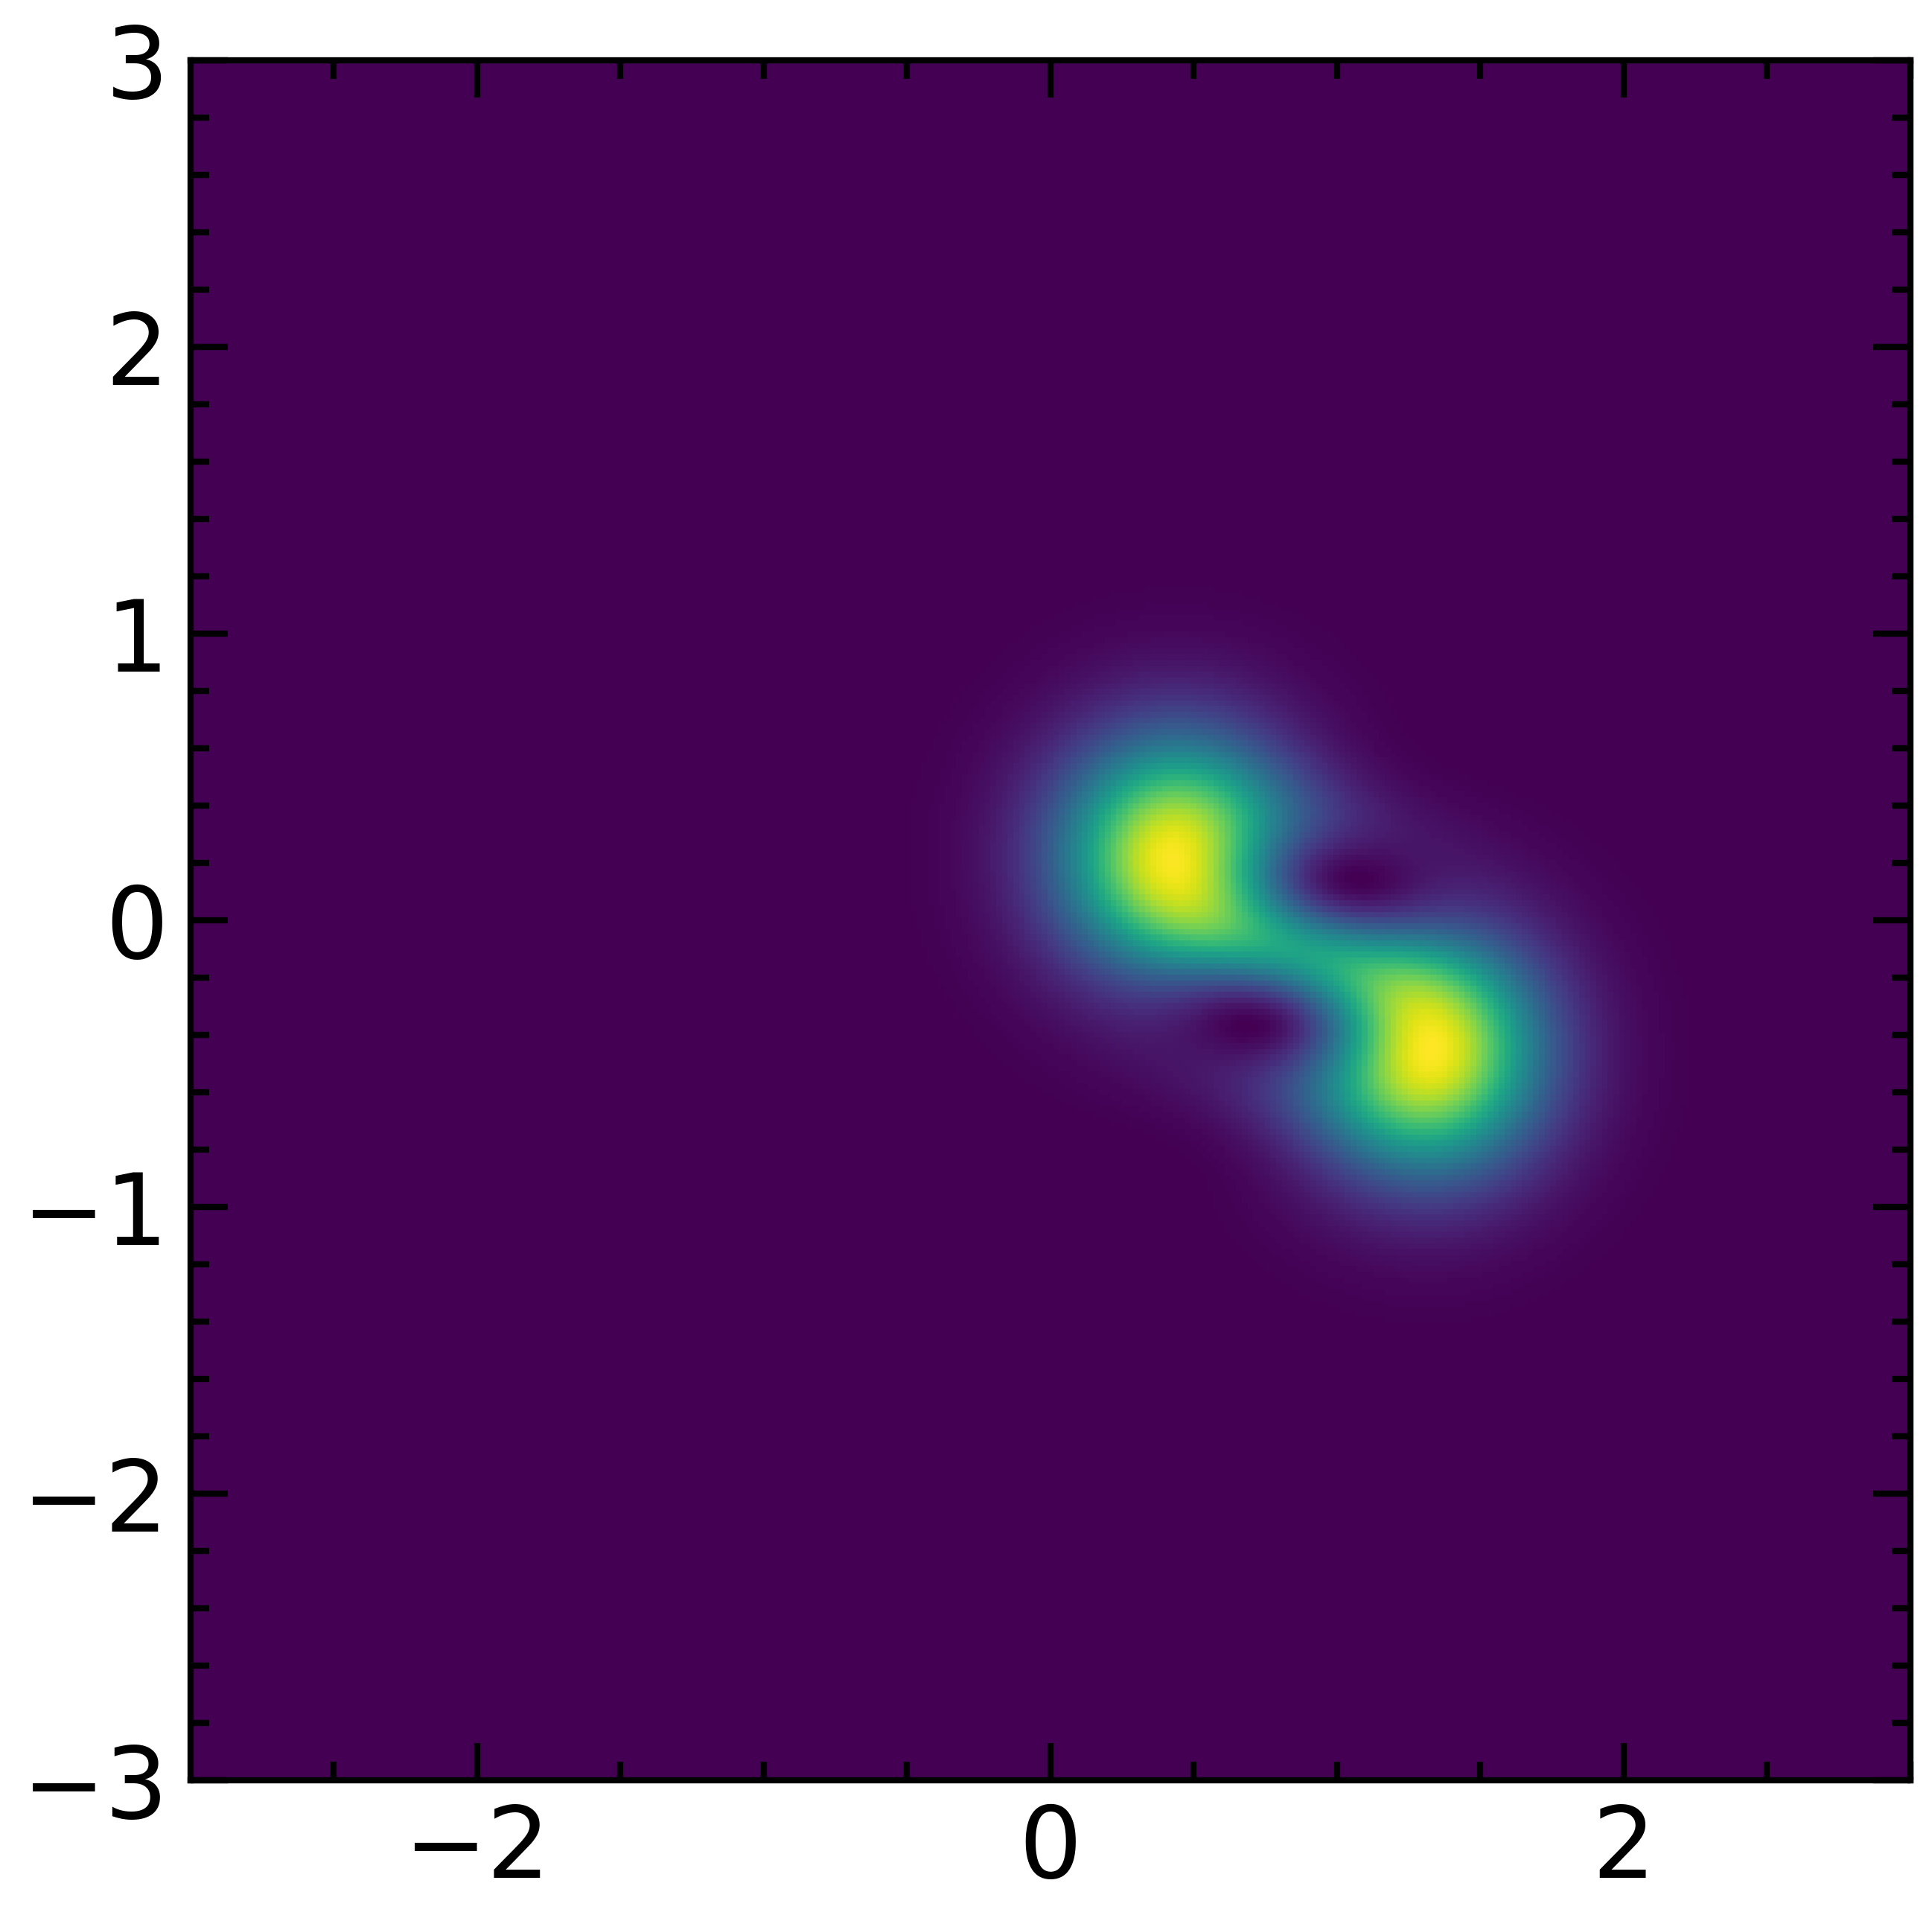

In [28]:
psi = sol.y[:,169]
# Convert psi to a 2d map for display.
# (We need "Fortran" ordering in reshape and move the origin in imshow to lower
# to have the x and y axis oriented to correct way)
psi_2d = np.reshape(psi, (HO_1d.N, HO_1d.N), order="F")
fig = plt.figure(figsize=(7,5))
im = plt.imshow(np.abs(psi_2d)**2, extent=HO_2d.extent, origin='lower')
fig.savefig('two_in_two_HO_plot.png', dpi=400, pad_inches=0.2)